<div align="center">

### IMPORTING THE LIBRARIES

</div>


In [4]:
#Importing the libraries
import pandas as pd  #Used for data manipulation
import numpy as np   #Used for numerical computations
import matplotlib.pyplot as plt #For data visualisation
import seaborn as sns #For data visualisation

#Importing sklearn to provide  tools for model building and evaluation.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



<div align="center">

### LOADING THE DATASET

</div>


In [6]:
# Loading the dataset
df = pd.read_csv('Banking_data.csv')


<div align="center">

### DISPLAYING THE FIRST FEW ROWS OF OUR DATASET

</div>


In [8]:
# Display the first few rows
print(df.head())

   age           job  marital marital_status  education default  balance  \
0   58    management  married        married   tertiary      no     2143   
1   44    technician   single         single  secondary      no       29   
2   33  entrepreneur  married        married  secondary      no        2   
3   47   blue-collar  married        married    unknown      no     1506   
4   33       unknown   single         single    unknown      no        1   

  housing loan  contact  day month day_month  duration  campaign  pdays  \
0     yes   no  unknown    5   may     5-May       261         1     -1   
1     yes   no  unknown    5   may     5-May       151         1     -1   
2     yes  yes  unknown    5   may     5-May        76         1     -1   
3     yes   no  unknown    5   may     5-May        92         1     -1   
4      no   no  unknown    5   may     5-May       198         1     -1   

   previous poutcome   y  
0         0  unknown  no  
1         0  unknown  no  
2         0

<div align="center">

### BASIC INFORMATION ABOUT OUR DATASET

</div>


In [10]:

#Basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

<div align="center">

### CHECKING FOR MISSING VALUES

</div>


In [12]:
# Cheking for missing values in each columns
print(df.isnull().sum())

age               0
job               0
marital           3
marital_status    3
education         3
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64


<div align="center">

### QUESTIONS

</div>



### Q1: What is the distribution of age among the clients?


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


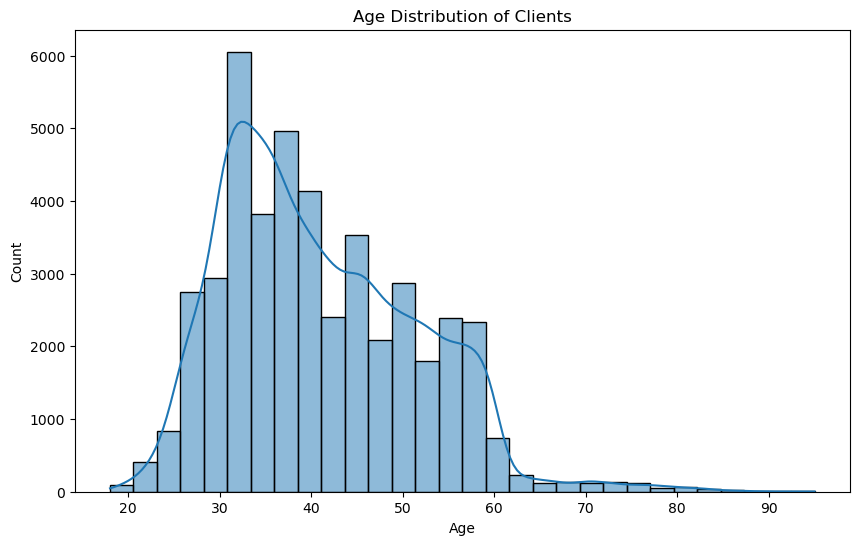

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



### Q2: How does the job type vary among the clients?


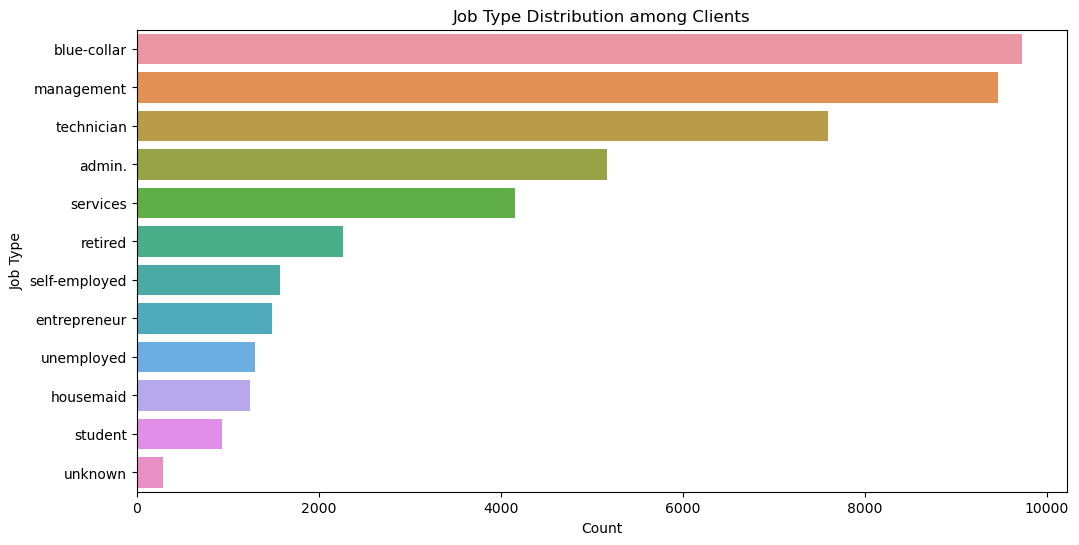

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title('Job Type Distribution among Clients')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()



### Q3: What is the marital status distribution of the clients?


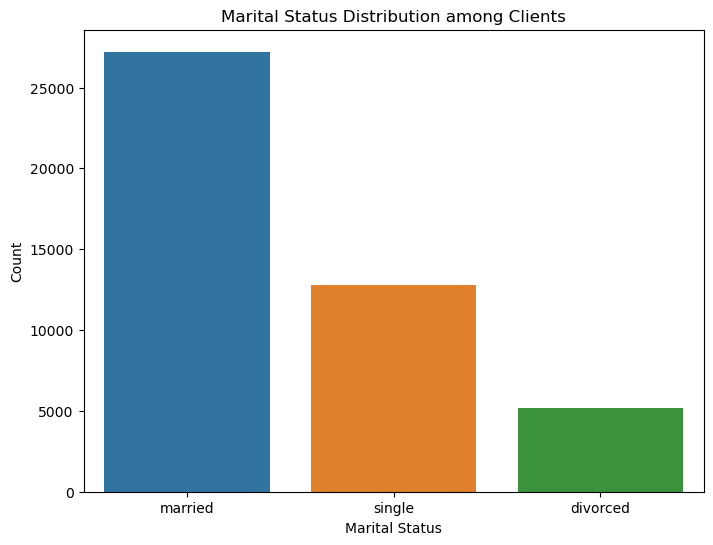

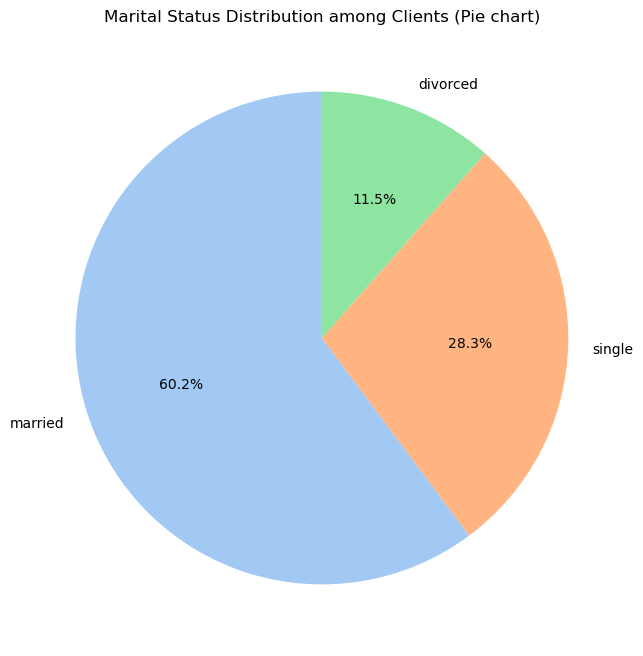

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='marital', data=df)
plt.title('Marital Status Distribution among Clients')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


##
print('\n')
plt.figure(figsize=(8,8))
df['marital'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Marital Status Distribution among Clients (Pie chart)')
plt.ylabel('')  # This removes the 'y' label for cleaner presentation
plt.show()




### Q4: What is the level of education among the clients?


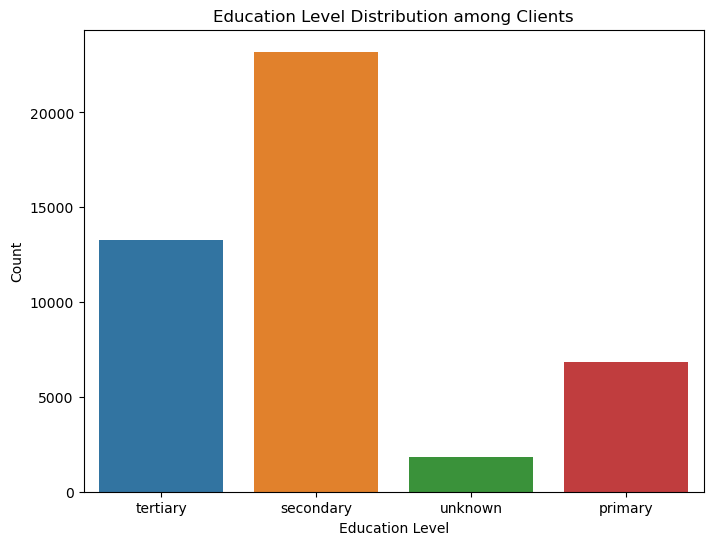

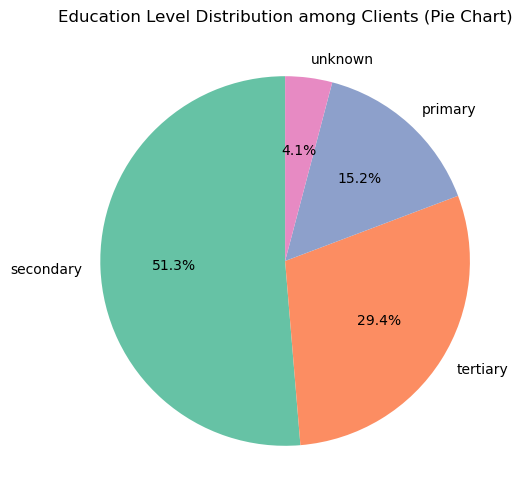

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='education', data=df)
plt.title('Education Level Distribution among Clients')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

##
print('\n')
plt.figure(figsize=(8,6))
df['education'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Education Level Distribution among Clients (Pie Chart)')
plt.ylabel('')  # This removes the y-label since it's not needed in a pie chart
plt.show()



### Q5: What proportion of clients have credit in default?


default
no     0.981975
yes    0.018025
Name: proportion, dtype: float64


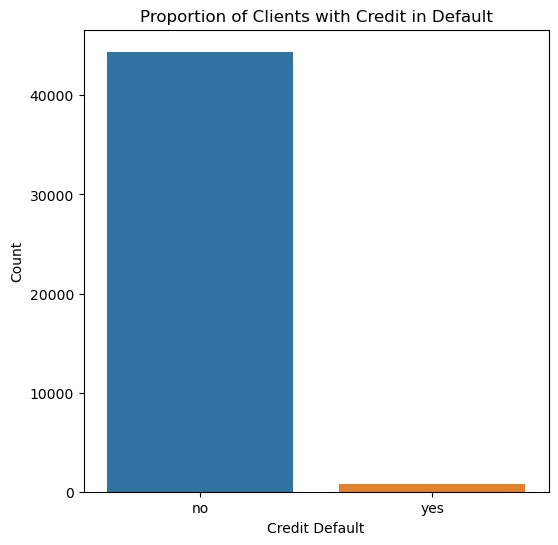

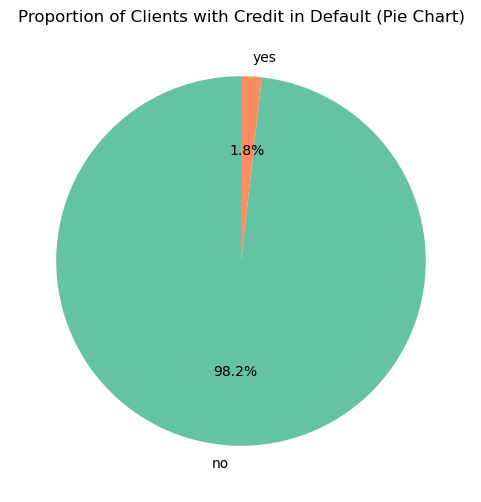

In [23]:
credit_default_proportion = df['default'].value_counts(normalize=True)
print(credit_default_proportion)

plt.figure(figsize=(6,6))
sns.countplot(x='default', data=df)
plt.title('Proportion of Clients with Credit in Default')
plt.xlabel('Credit Default')
plt.ylabel('Count')
plt.show()

##
print('\n')
# Calculate the proportion of each credit default category
credit_default_proportion = df['default'].value_counts(normalize=True)

# Plot the pie chart
plt.figure(figsize=(6,6))
credit_default_proportion.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Proportion of Clients with Credit in Default (Pie Chart)')
plt.ylabel('')  # Remove the y-label for a pie chart
plt.show()



### Q6: What is the distribution of average yearly balance among the clients?


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


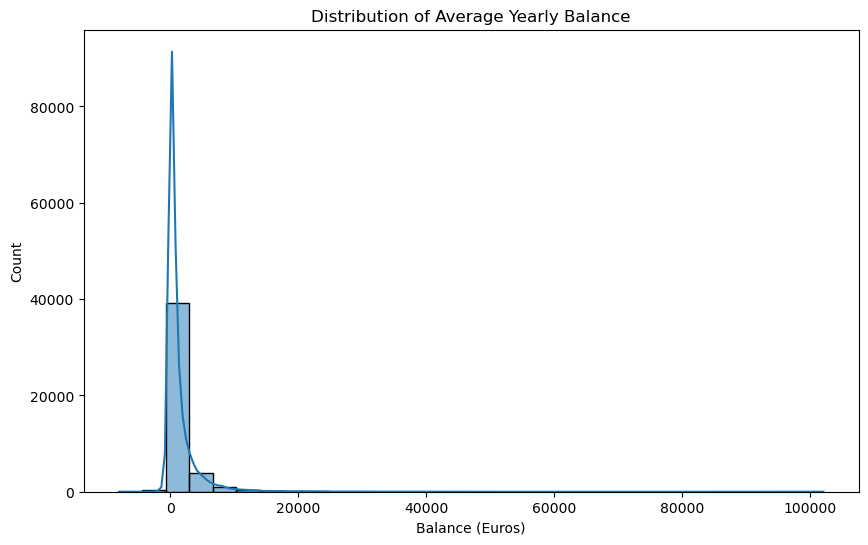

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['balance'], bins=30, kde=True)
plt.title('Distribution of Average Yearly Balance')
plt.xlabel('Balance (Euros)')
plt.ylabel('Count')
plt.show()



### Q7: How many clients have housing loans?


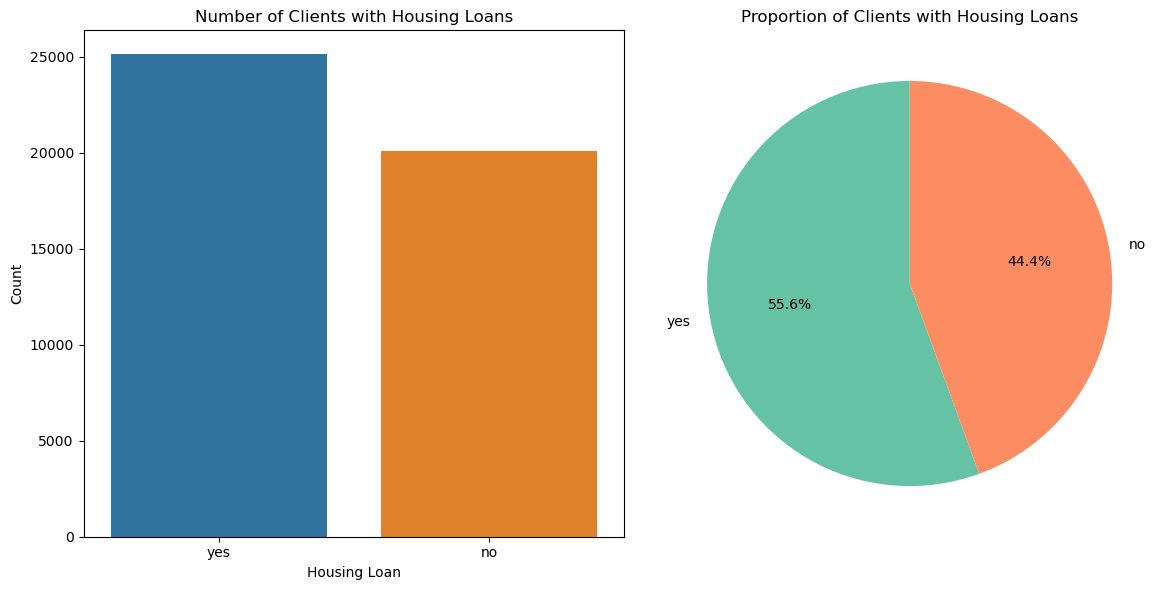

In [28]:
# Creating a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the count plot on the first subplot
sns.countplot(x='housing', data=df, ax=axs[0])
axs[0].set_title('Number of Clients with Housing Loans')
axs[0].set_xlabel('Housing Loan')
axs[0].set_ylabel('Count')

# Calculate the proportion of each housing loan category
housing_proportion = df['housing'].value_counts(normalize=True)

# Plot the pie chart on the second subplot
housing_proportion.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'), ax=axs[1])
axs[1].set_title('Proportion of Clients with Housing Loans')
axs[1].set_ylabel('')  # Remove the y-label for a pie chart

# Adjust layout
plt.tight_layout()
plt.show()


### Q8: How many clients have personal loans?


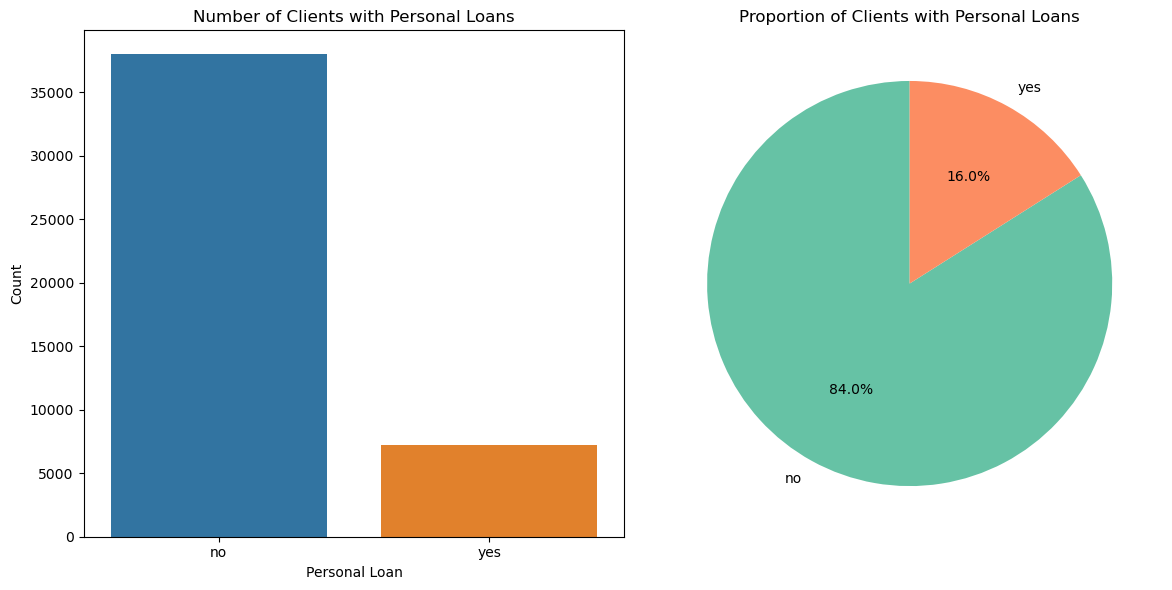

In [30]:
#Creating a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the count plot on the first subplot
sns.countplot(x='loan', data=df, ax=axs[0])
axs[0].set_title('Number of Clients with Personal Loans')
axs[0].set_xlabel('Personal Loan')
axs[0].set_ylabel('Count')

# Calculate the proportion of each personal loan category
loan_proportion = df['loan'].value_counts(normalize=True)

# Plot the pie chart on the second subplot
loan_proportion.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'), ax=axs[1])
axs[1].set_title('Proportion of Clients with Personal Loans')
axs[1].set_ylabel('')  # Remove the y-label for a pie chart

# Adjust layout
plt.tight_layout()
plt.show()


### Q9:What are the communication types used for contacting clients during the campaign?


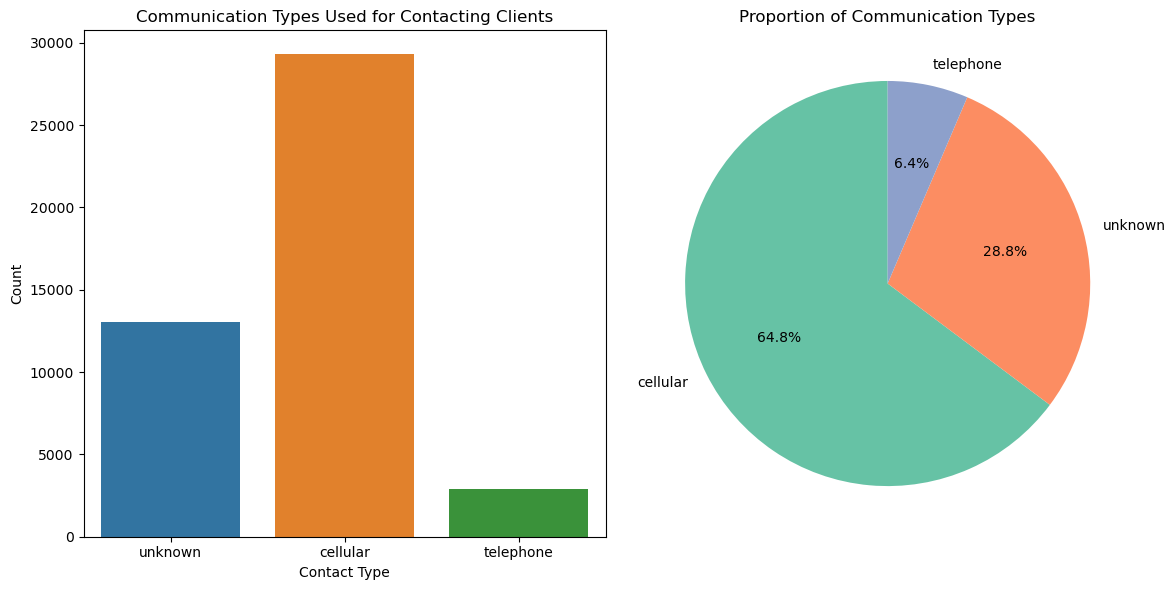

In [32]:
# Creating a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the count plot on the first subplot
sns.countplot(x='contact', data=df, ax=axs[0])
axs[0].set_title('Communication Types Used for Contacting Clients')
axs[0].set_xlabel('Contact Type')
axs[0].set_ylabel('Count')

# Calculate the proportion of each contact type
contact_proportion = df['contact'].value_counts(normalize=True)

# Plot the pie chart on the second subplot
contact_proportion.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'), ax=axs[1])
axs[1].set_title('Proportion of Communication Types')
axs[1].set_ylabel('')  # Remove the y-label for a pie chart

# Adjust layout
plt.tight_layout()
plt.show()



### Q10: What is the distribution of the last contact day of the month?


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


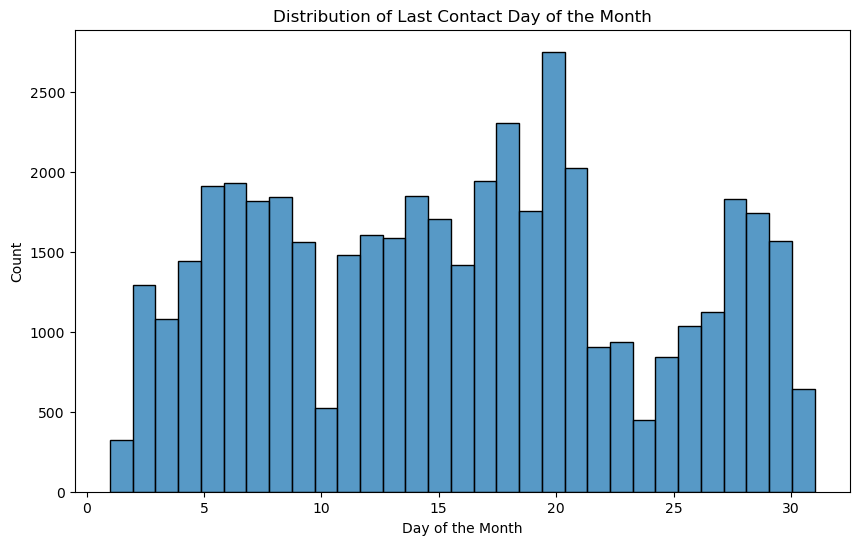

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df['day'], bins=31, kde=False)
plt.title('Distribution of Last Contact Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.show()


`
### Q11: How does the last contact month vary among the clients?


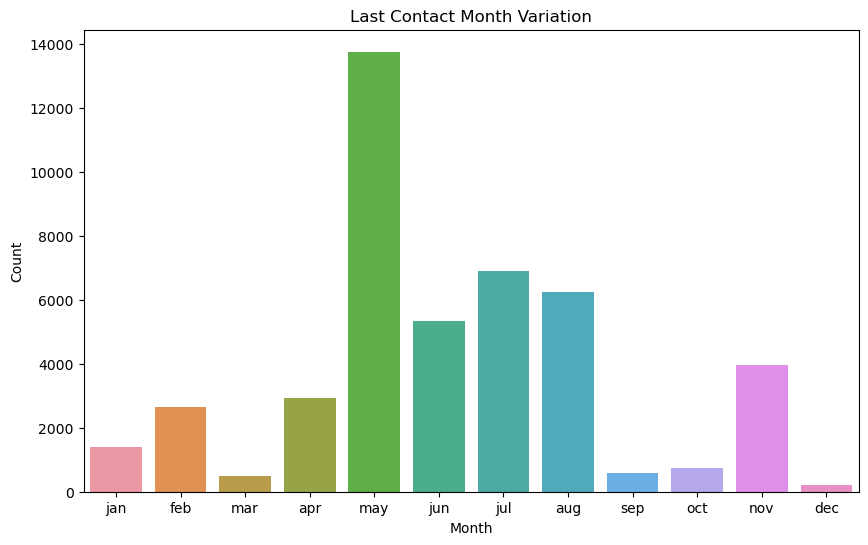

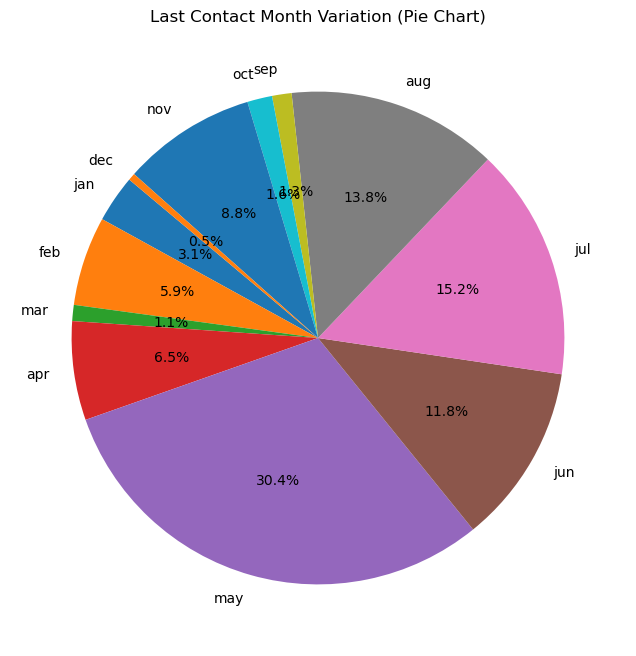

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='month', data=df, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Last Contact Month Variation')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##
print("\n")
# Get the count of each month
month_counts = df['month'].value_counts().reindex(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], fill_value=0)

# Create the pie chart
plt.figure(figsize=(8,8))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Last Contact Month Variation (Pie Chart)')
plt.show()


`
### Q12: What is the distribution of the duration of the last contact?


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


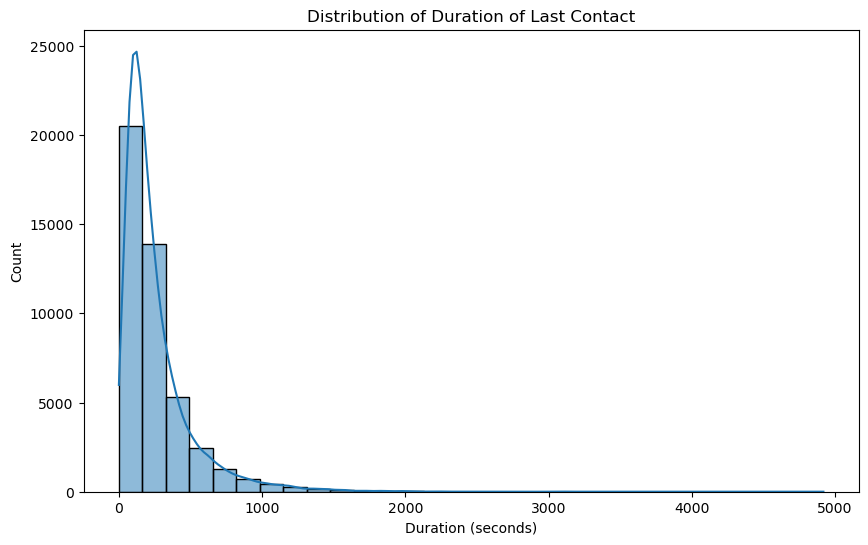

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Distribution of Duration of Last Contact')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()


`
### Q13: How many contacts were performed during the campaign for each client?


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


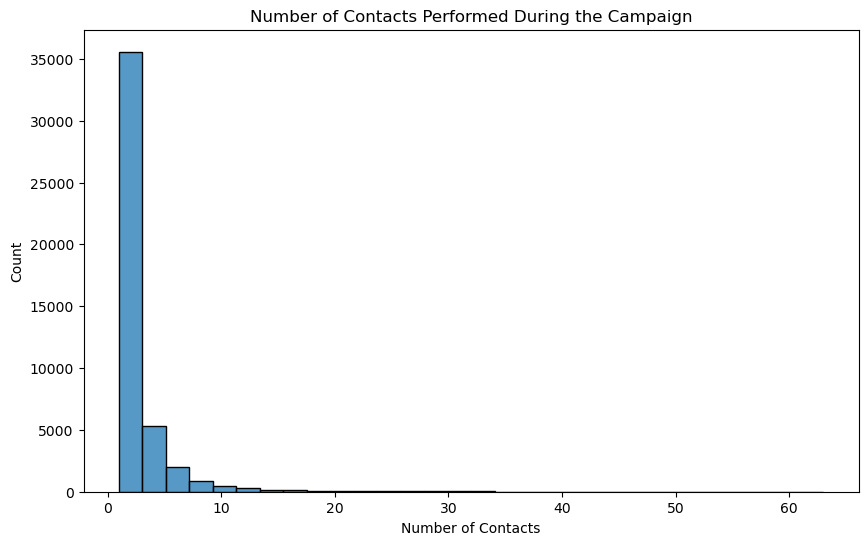

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(df['campaign'], bins=30, kde=False)
plt.title('Number of Contacts Performed During the Campaign')
plt.xlabel('Number of Contacts')
plt.ylabel('Count')
plt.show()


`
### Q14: What is the distribution of the number of days passed since the client was last contacted from a previous campaign?


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


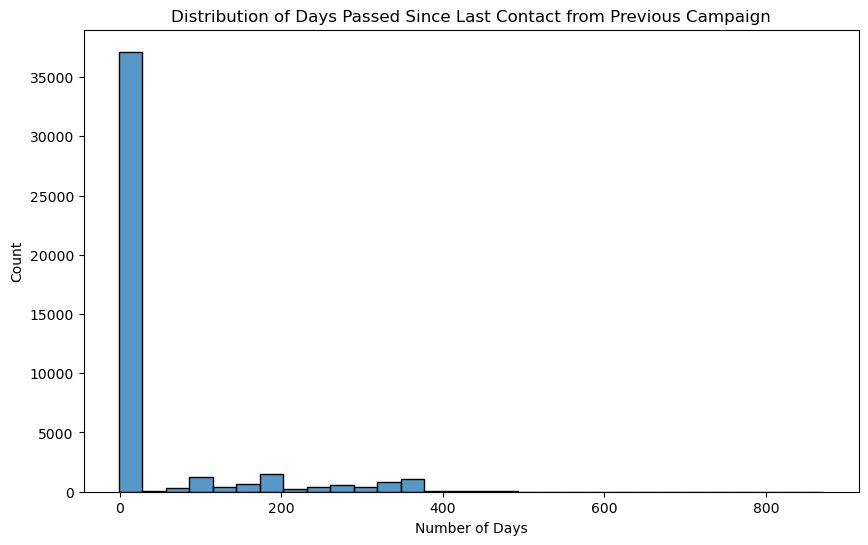

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(df['pdays'], bins=30, kde=False)
plt.title('Distribution of Days Passed Since Last Contact from Previous Campaign')
plt.xlabel('Number of Days')
plt.ylabel('Count')
plt.show()


`
### Q15: How many contacts were performed before the current campaign for each client?


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


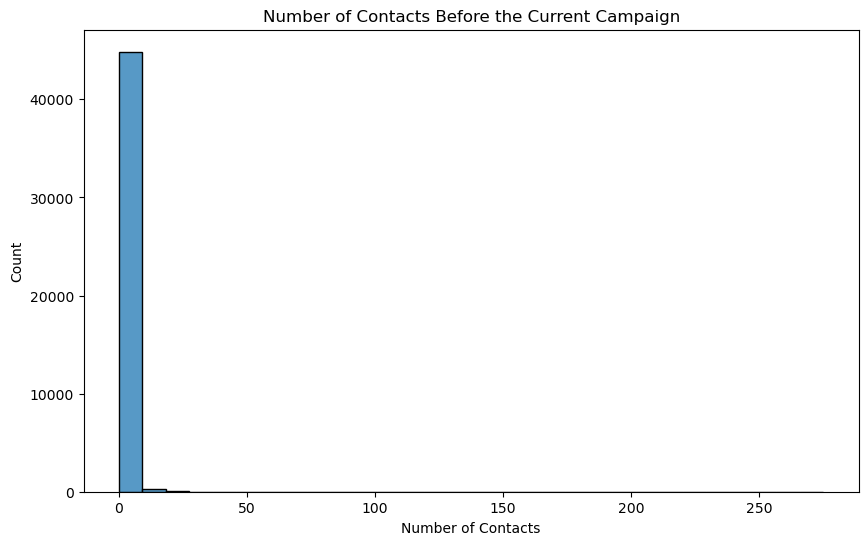

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df['previous'], bins=30, kde=False)
plt.title('Number of Contacts Before the Current Campaign')
plt.xlabel('Number of Contacts')
plt.ylabel('Count')
plt.show()



`
### Q16: What were the outcomes of the previous marketing campaigns?


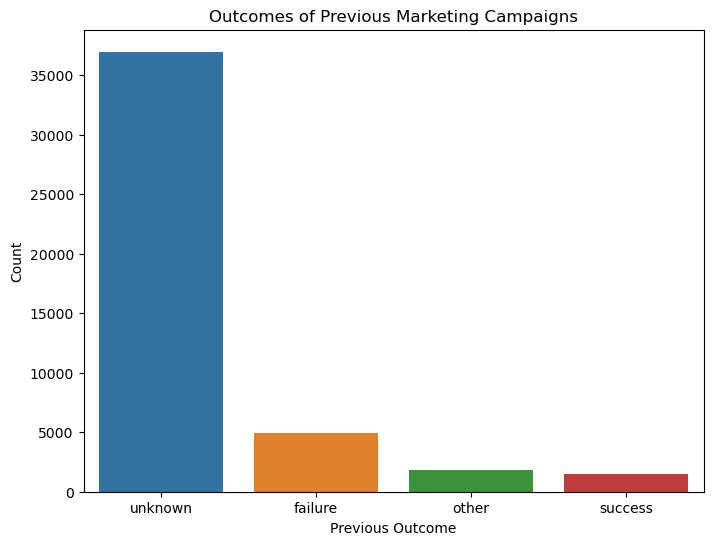

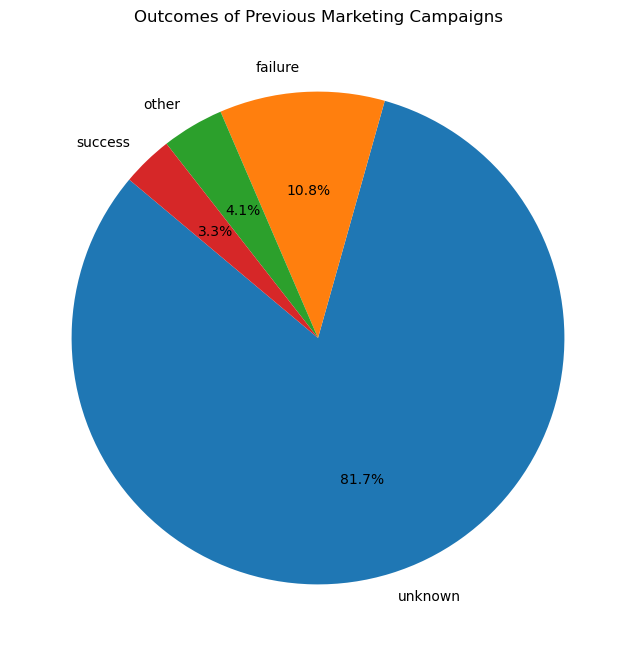

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x='poutcome', data=df)
plt.title('Outcomes of Previous Marketing Campaigns')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.show()

##
# Get the count of each outcome
outcome_counts = df['poutcome'].value_counts()

# Create the pie chart
plt.figure(figsize=(8,8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Outcomes of Previous Marketing Campaigns')
plt.show()


`
### Q17: What is the distribution of clients who subscribed to a term deposit vs. those who did not?


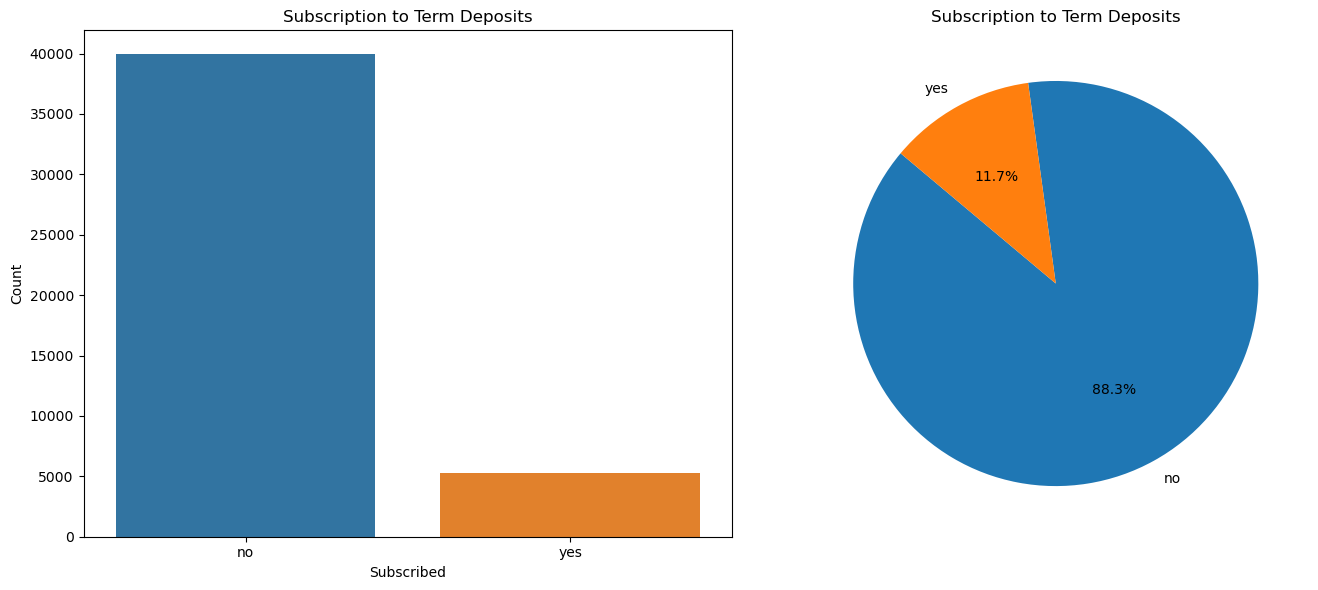

In [48]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the count plot on the first subplot
sns.countplot(x='y', data=df, ax=axes[0])
axes[0].set_title('Subscription to Term Deposits')
axes[0].set_xlabel('Subscribed')
axes[0].set_ylabel('Count')

# Get the count of each subscription outcome
subscription_counts = df['y'].value_counts()

# Plot the pie chart on the second subplot
axes[1].pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Subscription to Term Deposits')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

`
### Q18: Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?


               age   default   balance   housing      loan       day  \
age       1.000000 -0.017899  0.097789 -0.185655 -0.015732 -0.009095   
default  -0.017899  1.000000 -0.066745 -0.006008  0.077240  0.009422   
balance   0.097789 -0.066745  1.000000 -0.068765 -0.084350  0.004504   
housing  -0.185655 -0.006008 -0.068765  1.000000  0.041374 -0.027991   
loan     -0.015732  0.077240 -0.084350  0.041374  1.000000  0.011365   
day      -0.009095  0.009422  0.004504 -0.027991  0.011365  1.000000   
duration -0.004599 -0.010023  0.021565  0.005061 -0.012417 -0.030204   
campaign  0.004673  0.016829 -0.014578 -0.023534  0.010004  0.162483   
pdays    -0.023647 -0.029984  0.003425  0.124112 -0.022772 -0.093036   
previous  0.001663 -0.018345  0.016693  0.036904 -0.011104 -0.051685   
y         0.025648 -0.022451  0.052821 -0.139445 -0.068289 -0.028307   

          duration  campaign     pdays  previous         y  
age      -0.004599  0.004673 -0.023647  0.001663  0.025648  
default  -0.0

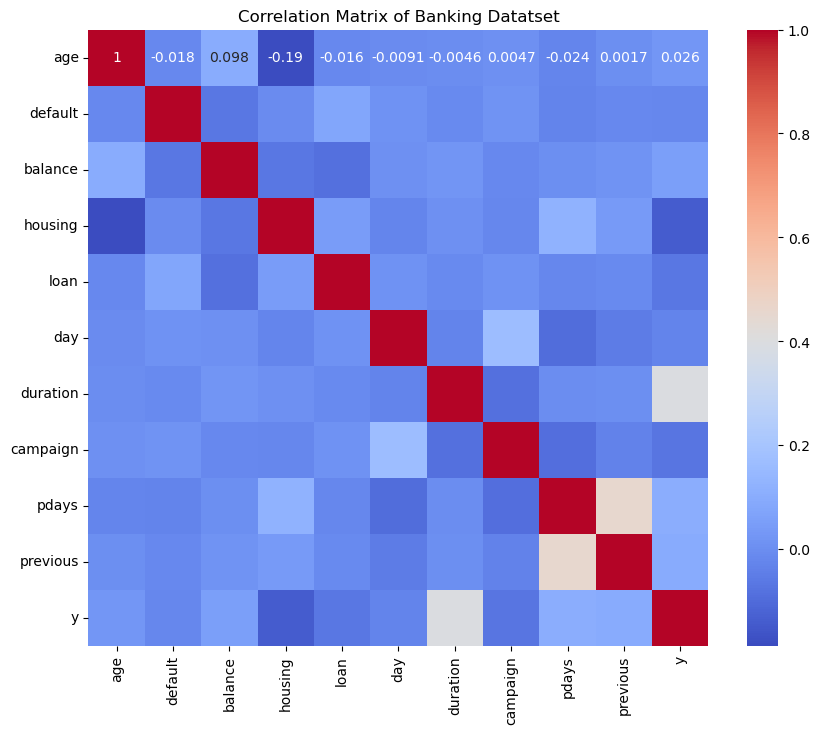

In [49]:
df['y'].replace({'no':0,'yes':1},inplace=True)
df['default'].replace({'no':0,'yes':1},inplace=True)
df['housing'].replace({'no':0,'yes':1},inplace=True)
df['loan'].replace({'no':0,'yes':1},inplace=True)
numeric_df = df.select_dtypes(include=['int64','float64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Banking Datatset')
plt.show()
